<a href="https://colab.research.google.com/github/anjali88/Data-Science/blob/master/MA_ARMA_ARIMA_FBProphet_HFT_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

# Modelling imports
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

# Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
# The input to Prophet is always a dataframe with two columns: ds and y. 
# The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 
# The y column must be numeric, and represents the measurement we wish to forecast.

from fbprophet import Prophet

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout

In [15]:
from google.colab import files
uploaded = files.upload()

Saving data_second.xlsx to data_second (1).xlsx


In [102]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
import io
sheets= pd.ExcelFile(io.BytesIO(uploaded['data_second.xlsx'])).sheet_names
data = pd.read_excel(io.BytesIO(uploaded['data_second.xlsx']),sheet_name=sheets[0])
print(data)
# if we want to know what sort of detail is provided with this dataset, we can call .keys()
data.keys()

                    Dates    Open   Close    High     Low         Value  Volume
0     2018-02-14 08:00:00  1682.0  1679.8  1682.0  1677.6  3.693538e+07   21978
1     2018-02-14 08:01:00  1679.8  1680.8  1681.6  1678.0  2.843408e+07   16930
2     2018-02-14 08:02:00  1681.2  1679.0  1681.2  1678.0  2.429556e+07   14466
3     2018-02-14 08:03:00  1679.0  1675.6  1679.8  1675.4  1.960217e+07   11683
4     2018-02-14 08:04:00  1674.6  1676.4  1677.4  1674.6  1.077211e+07    6427
...                   ...     ...     ...     ...     ...           ...     ...
68162 2018-08-29 13:45:00  1605.0  1604.4  1605.0  1604.4  1.622440e+06    1011
68163 2018-08-29 13:46:00  1604.6  1605.4  1605.4  1604.6  3.612856e+06    2251
68164 2018-08-29 13:47:00  1605.6  1606.2  1606.2  1605.6  7.136726e+06    4444
68165 2018-08-29 13:48:00  1606.4  1606.4  1606.6  1606.0  6.349328e+06    3953
68166 2018-08-29 13:49:00  1606.6  1606.6  1606.6  1606.6  6.024750e+05     375

[68167 rows x 7 columns]


Index(['Dates', 'Open', 'Close', 'High', 'Low', 'Value', 'Volume'], dtype='object')

In [0]:
data1 = pd.read_excel(io.BytesIO(uploaded['data_second.xlsx']),sheet_name=sheets[1])
data2 = pd.read_excel(io.BytesIO(uploaded['data_second.xlsx']),sheet_name=sheets[2])
data3 = pd.read_excel(io.BytesIO(uploaded['data_second.xlsx']),sheet_name=sheets[3])
data4 = pd.read_excel(io.BytesIO(uploaded['data_second.xlsx']),sheet_name=sheets[4])
data5 = pd.read_excel(io.BytesIO(uploaded['data_second.xlsx']),sheet_name=sheets[5])

In [139]:
print(sheets)

['Anglo American plc', 'BP', 'CONSTRUCTION&Materials', 'EVRAZ   Imdustrial Metals & Min', 'Oil& Gas Producer RDS CLASS A', 'Oil& Gas producer Class B']


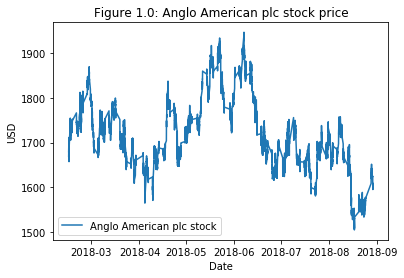

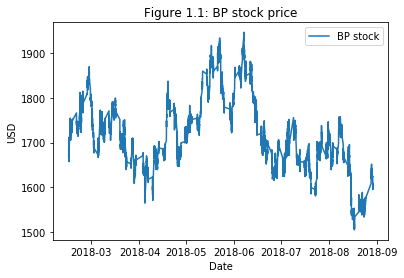

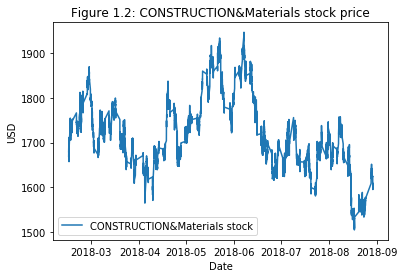

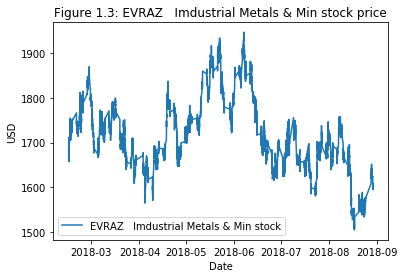

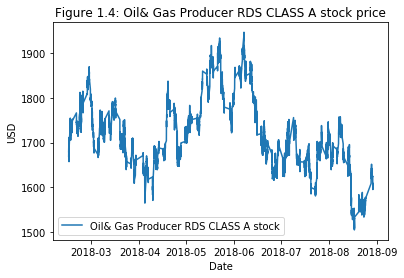

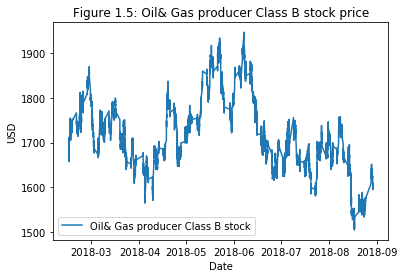

In [69]:
# Let's visualize the stock for the 7 months. The dashed vertical line represents the separation between training and test data.
plt.plot(data['Close'], label='{} stock'.format(sheets[0]))
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1.0: {} stock price'.format(sheets[0]))
plt.legend()
plt.show()

plt.plot(data['Close'], label='{} stock'.format(sheets[1]))
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1.1: {} stock price'.format(sheets[1]))
plt.legend()
plt.show()

plt.plot(data['Close'], label='{} stock'.format(sheets[2]))
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1.2: {} stock price'.format(sheets[2]))
plt.legend()
plt.show()

plt.plot(data['Close'], label='{} stock'.format(sheets[3]))
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1.3: {} stock price'.format(sheets[3]))
plt.legend()
plt.show()

plt.plot(data['Close'], label='{} stock'.format(sheets[4]))
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1.4: {} stock price'.format(sheets[4]))
plt.legend()
plt.show()

plt.plot(data['Close'], label='{} stock'.format(sheets[5]))
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1.5: {} stock price'.format(sheets[5]))
plt.legend()
plt.show()


# Data Analysis - Autocorrelation plot

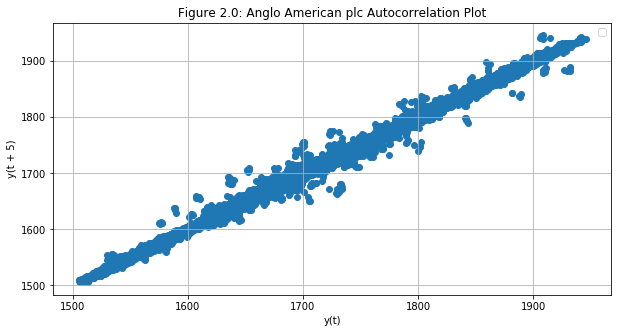

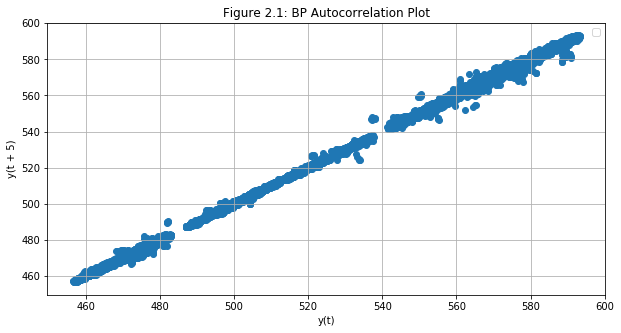

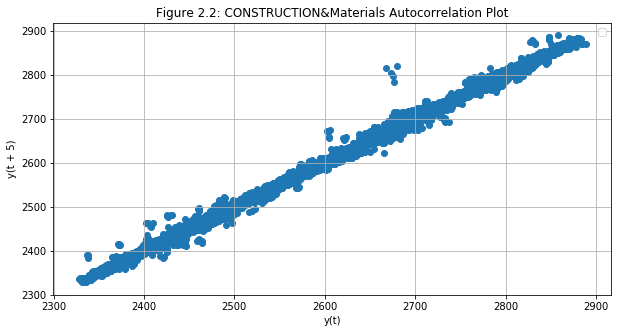

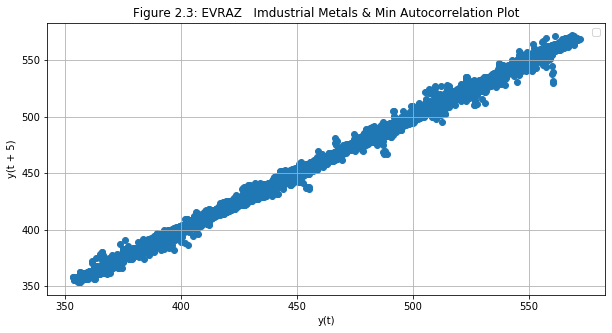

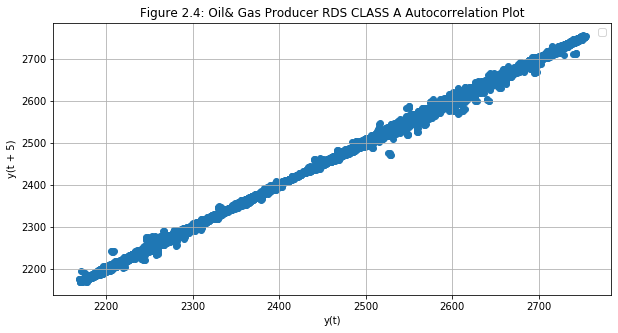

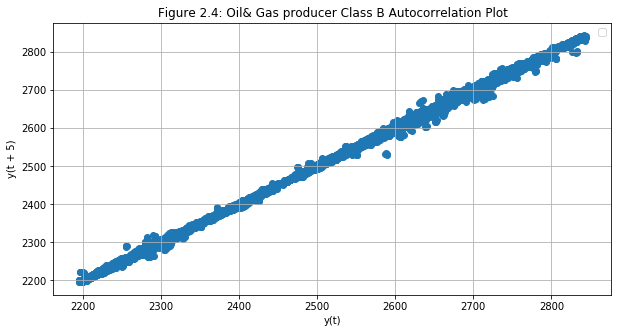

In [146]:
plt.figure(figsize=(10,5))
lag_plot(data['Close'], lag=5)
plt.title('Figure 2.0: {} Autocorrelation Plot'.format(sheets[0]))
plt.grid(True)
plt.legend();

plt.figure(figsize=(10,5))
lag_plot(data1['Close'], lag=5)
plt.title('Figure 2.1: {} Autocorrelation Plot'.format(sheets[1]))
plt.grid(True)
plt.legend();

plt.figure(figsize=(10,5))
lag_plot(data2['Close'], lag=5)
plt.title('Figure 2.2: {} Autocorrelation Plot'.format(sheets[2]))
plt.grid(True)
plt.legend();

plt.figure(figsize=(10,5))
lag_plot(data3['Close'], lag=5)
plt.title('Figure 2.3: {} Autocorrelation Plot'.format(sheets[3]))
plt.grid(True)
plt.legend();

plt.figure(figsize=(10,5))
lag_plot(data4['Close'], lag=5)
plt.title('Figure 2.4: {} Autocorrelation Plot'.format(sheets[4]))
plt.grid(True)
plt.legend();

plt.figure(figsize=(10,5))
lag_plot(data5['Close'], lag=5)
plt.title('Figure 2.4: {} Autocorrelation Plot'.format(sheets[5]))
plt.grid(True)
plt.legend();


# Correlation

In [61]:
new_data  = pd.DataFrame()
for sheet in sheets:
    new_data[sheet]=pd.read_excel(io.BytesIO(uploaded['data_second.xlsx']),index_col="Dates",parse_dates=True, sheet_name=sheet)['Close']
new_data

,Anglo American plc,BP,CONSTRUCTION&Materials,EVRAZ Imdustrial Metals & Min,Oil& Gas Producer RDS CLASS A,Oil& Gas producer Class B
Dates,,,,,,
2018-02-14 08:00:00,1679.8,NaN,2479.0,366.4,2295.5,2315.5
2018-02-14 08:01:00,1680.8,476.25,2478.0,NaN,2293.5,2314.0
2018-02-14 08:02:00,1679.0,475.00,NaN,NaN,2286.5,2306.0
2018-02-14 08:03:00,1675.6,474.90,NaN,365.9,2286.0,2306.5
2018-02-14 08:04:00,1676.4,476.30,2481.0,366.5,2287.5,2309.0
...,...,...,...,...,...,...
2018-08-29 13:45:00,1604.4,557.80,2658.0,520.0,2545.5,2598.5
2018-08-29 13:46:00,1605.4,557.90,2658.0,520.4,NaN,2598.0
2018-08-29 13:47:00,1606.2,558.10,2659.0,520.6,2546.0,2598.5


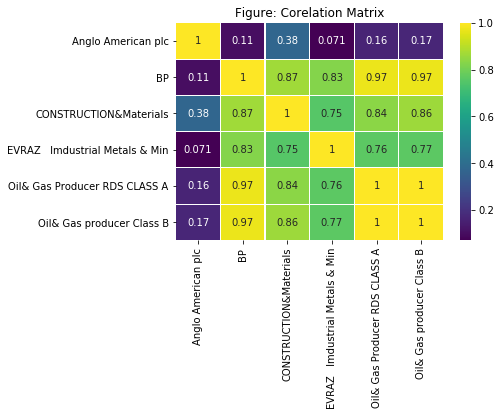

In [64]:
import seaborn as sns
cor=new_data.corr(method='pearson')
plt.title("Figure: Corelation Matrix")
cm=plt.cm.viridis
corr = sns.heatmap(cor,cmap=cm,linewidths=0.1,linecolor='white',annot=True)
plt.show()

In [167]:
# We will only select features which has correlation of above 0.85 (taking absolute value) with the Oil & Gas Producer RDS Class A. 
# Correlation with target
cor_target = abs(cor["Oil& Gas Producer RDS CLASS A"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.85]
print("Relevant Features:\n")
print(relevant_features)

Relevant Features:

BP                               0.972608
Oil& Gas Producer RDS CLASS A    1.000000
Oil& Gas producer Class B        0.996374
Name: Oil& Gas Producer RDS CLASS A, dtype: float64


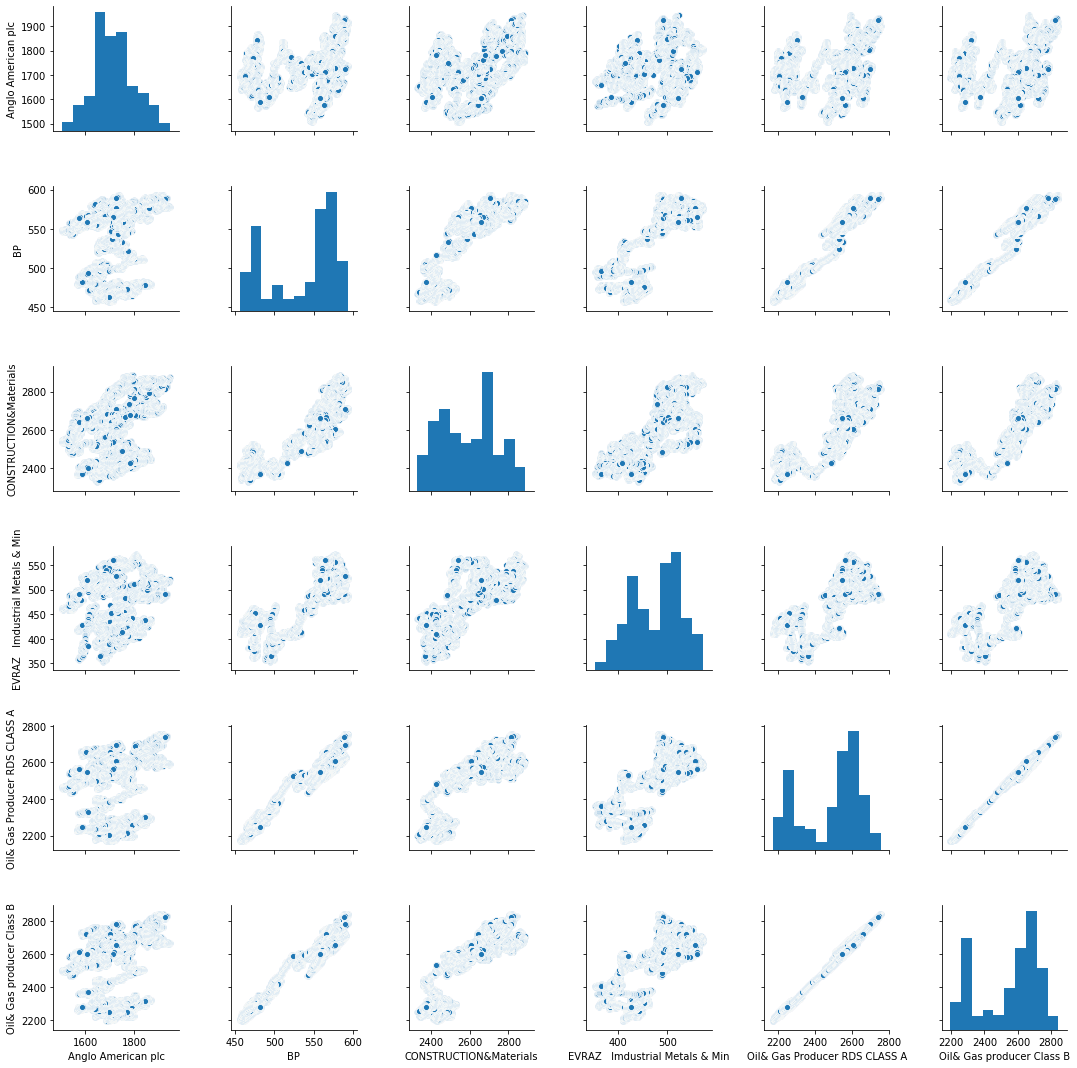

In [168]:
sns.pairplot(new_data)

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



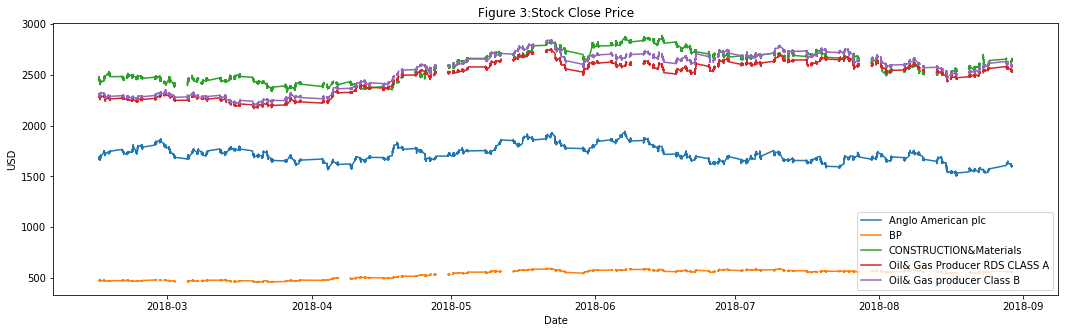

In [79]:
# Let's visualize the stock for the 7 months. The dashed vertical line represents the separation between training and test data.
plt.figure(figsize=(18, 5))
plt.plot(new_data ['Anglo American plc'], label='Anglo American plc')
plt.plot(new_data ['BP'], label='BP')
plt.plot(new_data ['CONSTRUCTION&Materials'], label='CONSTRUCTION&Materials')
#plt.plot(new_data ['EVRAZ Imdustrial Metals & Min'], label='EVRAZ Imdustrial Metals & Min', color='r')
plt.plot(new_data ['Oil& Gas Producer RDS CLASS A'], label='Oil& Gas Producer RDS CLASS A')
plt.plot(new_data ['Oil& Gas producer Class B'], label='Oil& Gas producer Class B')

plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 3:Stock Close Price')
plt.legend()
plt.show()


In [84]:
print('There are {} number of records  in the dataset.'.format(new_data.shape))

There are (68167, 6) number of records  in the dataset.


# Technical Indicators

In [0]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    #dataset['20sd'] = pd.stats.moments.rolling_std(dataset['Close'],20)
    dataset['20sd'] = dataset['Close'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Close']-1
    
    return dataset

In [161]:
import warnings
warnings.filterwarnings("ignore")
dataset_TI_df = get_technical_indicators(data4[['Close']])
print('{} Technical Indicators\n'.format(sheets[4]))
print(dataset_TI_df)

Oil& Gas Producer RDS CLASS A Technical Indicators

        Close          ma7         ma21  ...   lower_band          ema  momentum
0      2295.5          NaN          NaN  ...          NaN  2295.500000    2294.5
1      2293.5          NaN          NaN  ...          NaN  2294.000000    2292.5
2      2286.5          NaN          NaN  ...          NaN  2288.807692    2285.5
3      2286.0          NaN          NaN  ...          NaN  2286.912500    2285.0
4      2287.5          NaN          NaN  ...          NaN  2287.305785    2286.5
...       ...          ...          ...  ...          ...          ...       ...
67319  2546.5  2546.000000  2545.619048  ...  2542.965847  2546.205615    2545.5
67320  2547.0  2545.857143  2545.690476  ...  2543.024906  2546.735205    2546.0
67321  2545.5  2545.928571  2545.738095  ...  2543.134454  2545.911735    2544.5
67322  2546.0  2546.000000  2545.809524  ...  2543.278142  2545.970578    2545.0
67323  2547.0  2546.214286  2545.928571  ...  2543.745503

In [0]:
# Let's visualize the last 400 days of these indicators.
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for {} - last {} days.'.format(sheets[4],last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

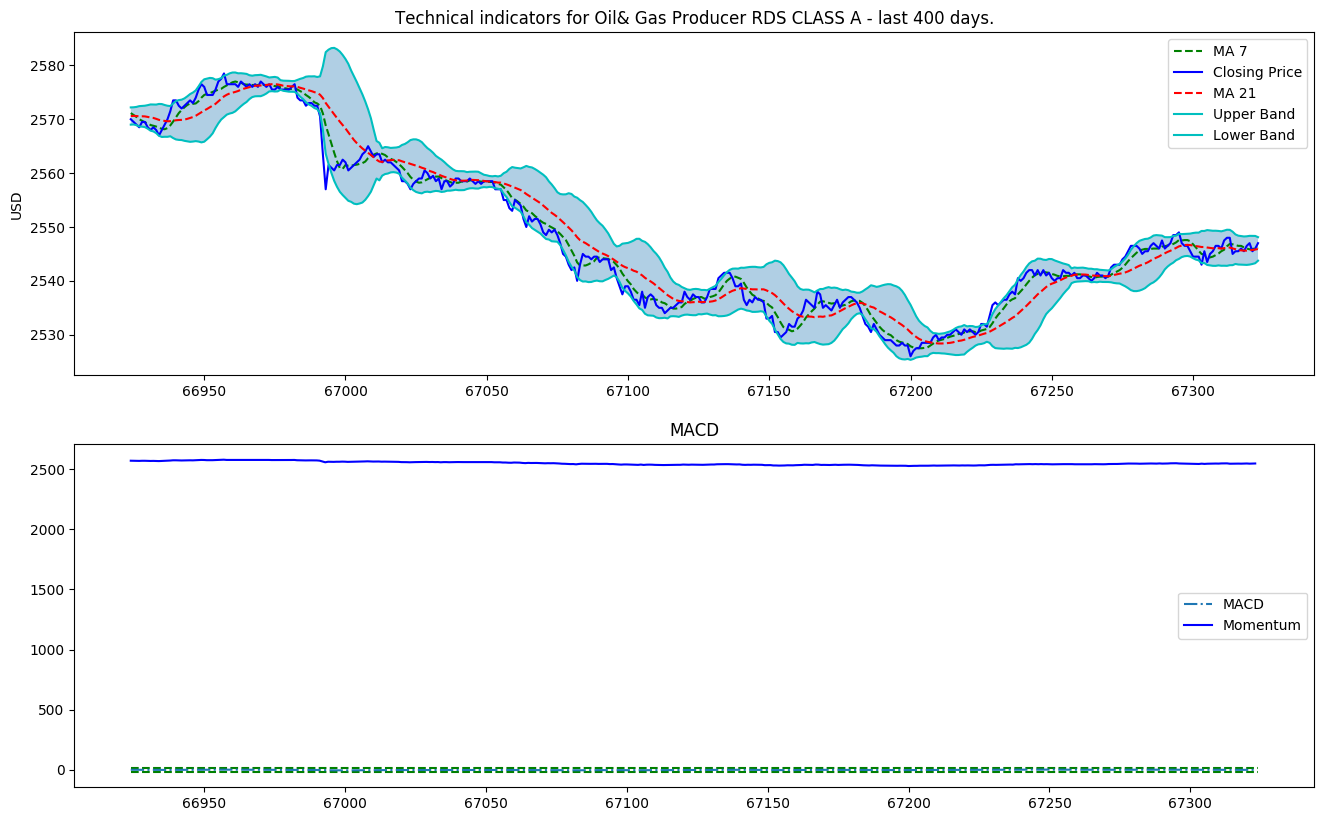

In [165]:
plot_technical_indicators(dataset_TI_df, 400)

# Fundamental analysis
For fundamental analysis we will perform sentiment analysis on all daily news about Oil& Gas Producer RDS CLASS A. 

In [113]:
# Using sigmoid the end result will be between 0 and 1. The closer the score is to 0 - the more negative the news is (closer to 1 indicates positive sentiment). For each day, we will create the average daily score (as a number between 0 and 1) and add it as a feature.

# Bidirectional Embedding Representations from Transformers - BERT : For the purpose of classifying news as positive or negative (or neutral) we will use BERT, which is a pre-trained language representation.
# Pretrained BERT models are already available in MXNet/Gluon. We just need to instantiated them and add two (arbitrary number) Dense layers, going to softmax - the score is from 0 to 1.

! pip install utils
! pip install mxnet
!pip install xgboost sklearn

     |████████████████████████████████| 25.4MB 38.5MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# Bidirectional Embedding Representations from Transformers - BERT
For the purpose of classifying news as positive or negative (or neutral) we will use BERT, which is a pre-trained language representation.

Pretrained BERT models are already available in MXNet/Gluon. We just need to instantiated them and add two (arbitrary number) Dense layers, going to softmax - the score is from 0 to 1.

In [115]:
! pip install bert

  Created wheel for bert: filename=bert-2.2.0-cp36-none-any.whl size=3754 sha256=947e1bcf0177596e9a059070485710b0757022f95778c554ef034a6cc3f3b241
  Stored in directory: /root/.cache/pip/wheels/fe/71/b7/941459453bd38e5d97a8c886361dee19325e9933c9cf88ad46
  Created wheel for erlastic: filename=erlastic-2.0.0-cp36-none-any.whl size=6789 sha256=2a8d371e1b78003c896994cabd7f27199cab88f6e493d01ede531e1d66637a46
  Stored in directory: /root/.cache/pip/wheels/02/62/46/93c713a5f061aeeb4f16eb6bf5ee798816e6ddda70faa78e69
Successfully built bert erlastic


# Fourier transforms for trend analysis 

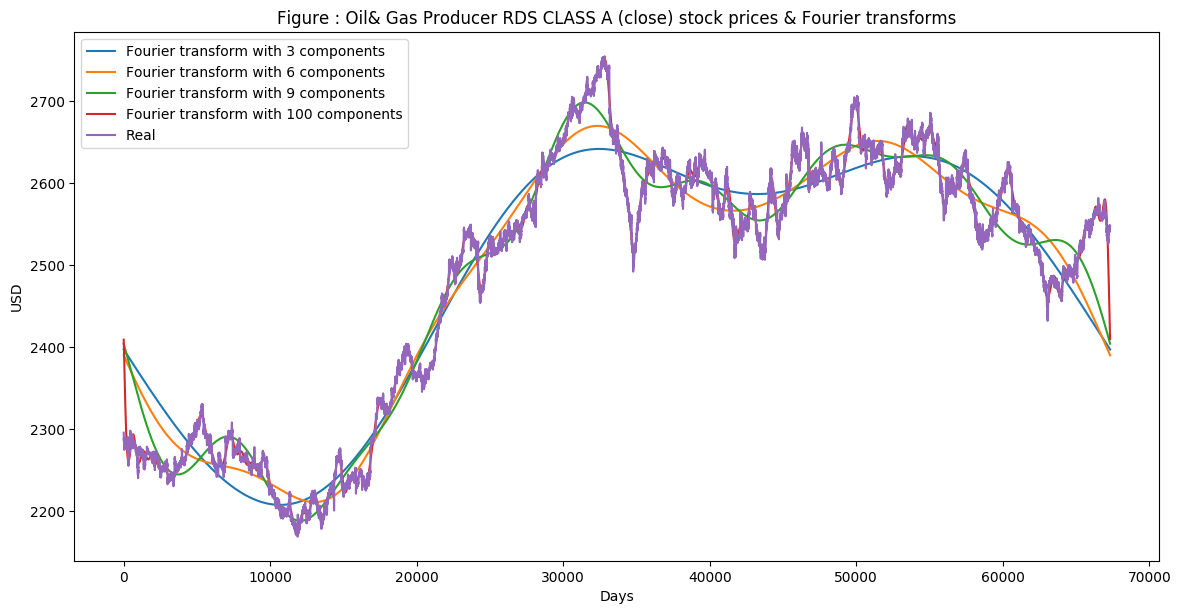

In [166]:
# We will Fourier transforms to extract global and local trends in the  stock, and to also denoise it a little
# import bert
import bert
data_FT = data4[['Dates', 'Close']]

close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure : {} (close) stock prices & Fourier transforms'.format(sheets[4]))
plt.legend()
plt.show()

As you see in Figure above the more components from the Fourier transform we use, the closer the approximation function is to the real stock price (the 100 components transform is almost identical to the original function - the red and the purple lines almost overlap. We use Fourier transforms for the purpose of extracting long- and short-term trends so we will use the transforms with 3, 6, and 9 components. You can infer that the transform with 3 components serves as the long term trend.

Another technique used to denoise data is call wavelets. Wavelets and Fourier transform gave similar results so we will only use Fourier transforms.

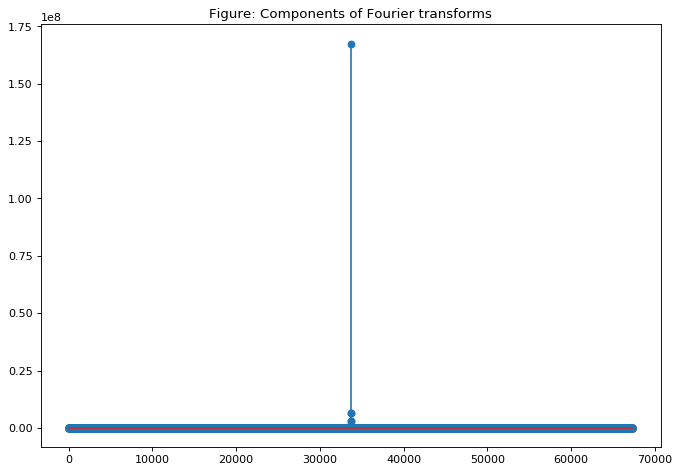

In [171]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure: Components of Fourier transforms')
plt.show()

#ARIMA - as feature
ARIMA is a technique for predicting time series data. Althouth ARIMA will not serve as our final prediction, we will use it as a technique to denoise the stock a little and to (possibly) extract some new patters or features.

In [172]:
from pandas import DataFrame
from pandas import datetime
from utils import *

import time
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx

from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score
context = mx.cpu(); model_ctx=mx.cpu()
mx.random.seed(1719)

series = data_FT['Close']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                67323
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -114733.668
Method:                       css-mle   S.D. of innovations              1.330
Date:                Fri, 31 Jan 2020   AIC                         229481.337
Time:                        23:45:43   BIC                         229545.158
Sample:                             1   HQIC                        229501.056
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0037      0.005      0.753      0.451      -0.006       0.013
ar.L1.D.Close    -0.0249      0.004     -6.468      0.000      -0.032      -0.017
ar.L2.D.Close     0.0041      0.004     

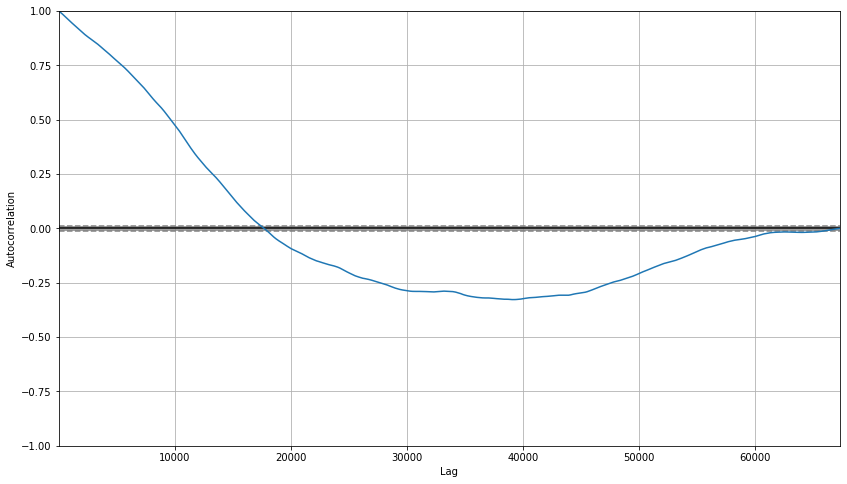

<Figure size 800x560 with 0 Axes>

In [173]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [0]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
print(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

[2295.5 2293.5 2286.5 ... 2545.5 2546.  2547. ]


In [0]:
# Plot the predicted (from ARIMA) and real prices
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on {} stock'.format(sheets[4]))
plt.legend()
plt.show()

#Seasonal decompose

<Figure size 1152x576 with 0 Axes>

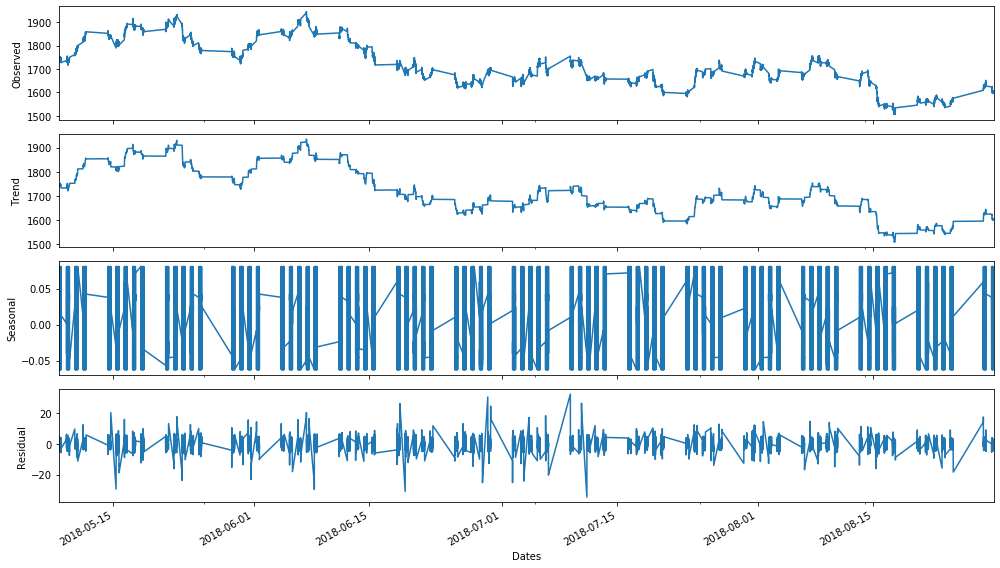

             t       t+1       t+5      t+10      t+30
t     1.000000  0.999174  0.998152  0.994080  0.999792
t+1   0.999174  1.000000  0.998967  0.994886  0.998967
t+5   0.998152  0.998967  1.000000  0.995889  0.997951
t+10  0.994080  0.994886  0.995889  1.000000  0.993879
t+30  0.999792  0.998967  0.997951  0.993879  1.000000


In [98]:
rcParams['figure.figsize'] = 14, 8
data_arima = data4['Close']
result = seasonal_decompose(data_arima[-40000:], model='additive', freq=30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

values = DataFrame(data4['Close'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)


MSE: 9533.055313937599
MAE: 80.28706310469106
RMSE: 97.63736638161437


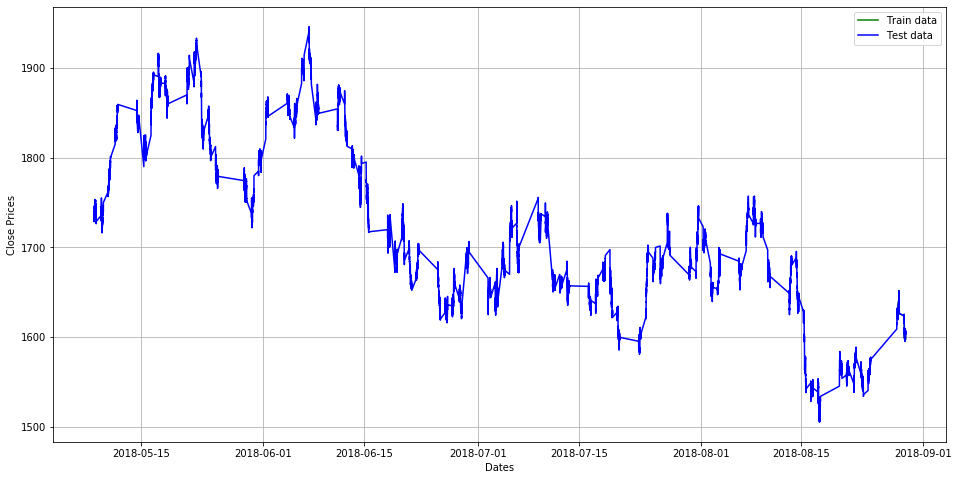

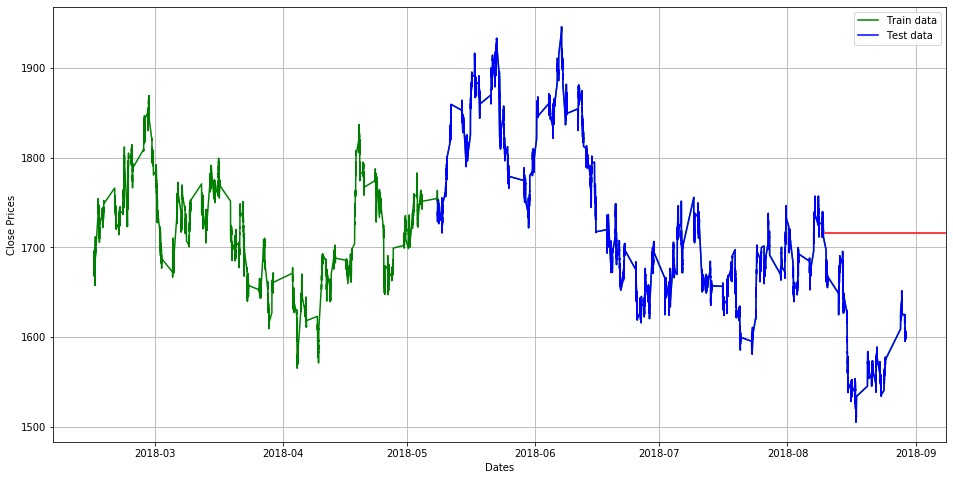

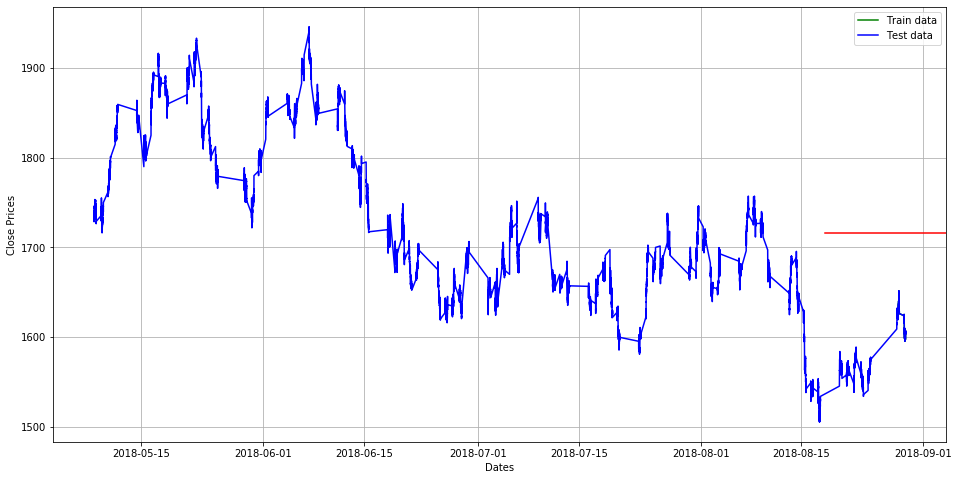

In [99]:
# Train-Test Split
train_data, test_data = data4[0:-40000], data4[-40000:]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data4['Close'].tail(600), 'green', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.legend()

# Mean value plot
mean_value = data4['Close'].mean() # calculation of mean price

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data4['Close'], 'green', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data4['Close'].tail(600), 'green', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['Close'], np.full(len(test_data), mean_value))))
print('MAE: '+str(mean_absolute_error(test_data['Close'], np.full(len(test_data), mean_value))))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['Close'], np.full(len(test_data), mean_value)))))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Lag: 49
MSE: 2.8604096489419852
MAE: 1.0493090094755688
RMSE: 1.6912745634408344


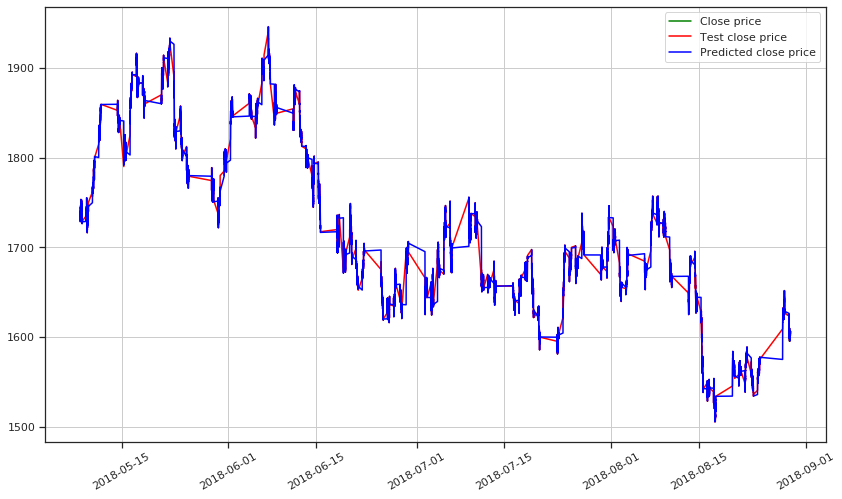

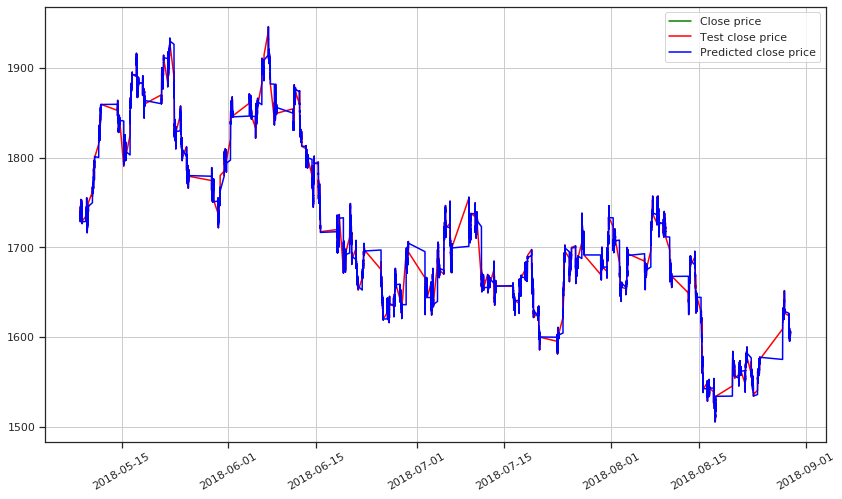

In [0]:
# Autoregression model
train_ar = train_data['Close']
test_ar = test_data['Close']

model = AR(train_ar)# train autoregression
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)
 
plt.figure(figsize=(14,8))
plt.plot(data4.index[-600:], data4['Close'].tail(600), color='green', label='Close price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(data4.index[-100:], data4['Close'].tail(100), color='green', label='Close price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['Close'], predictions)))
print('MAE: '+str(mean_absolute_error(test_data['Close'], predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['Close'], predictions))))

In [0]:
# Moving Average model
train_ma = train_data['Close']
test_ma = test_data['Close']

history = [x for x in train_ma]
y = test_ma
# make first prediction
predictions = list()
model = ARMA(history, order=(0,8))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)

history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARMA(history, order=(0,8))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Close'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

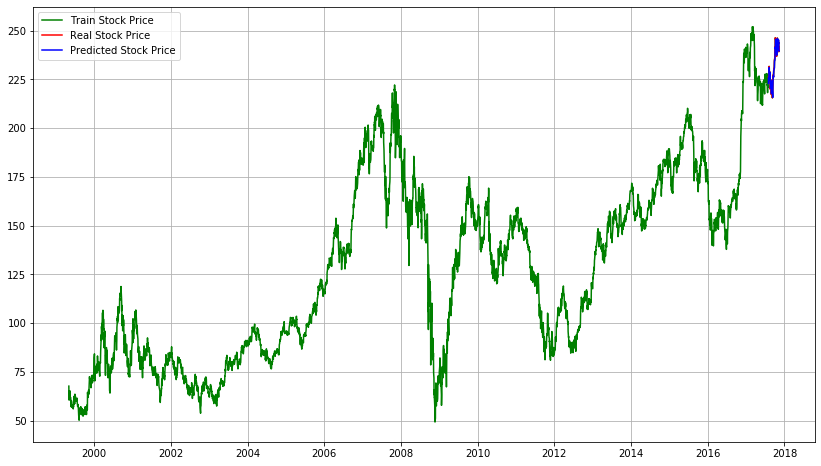

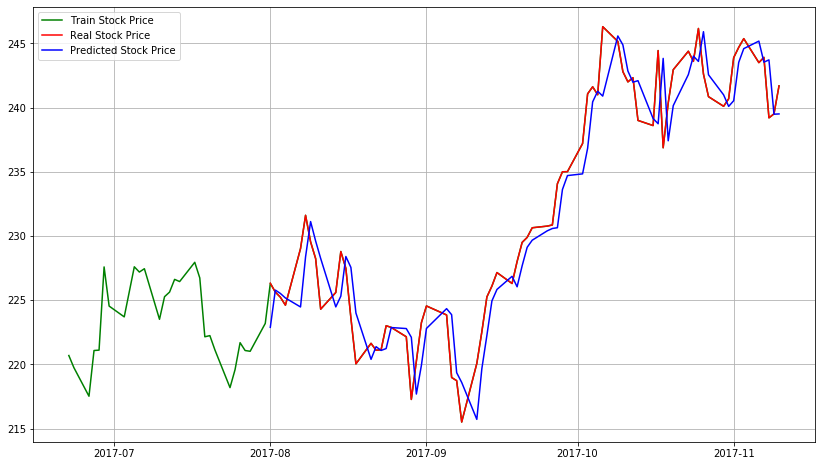

MSE: 6.677045320364875
MAE: 2.016518003129875
RMSE: 2.583997933506309


In [0]:
# ARMA model
train_arma = train_data['Open']
test_arma = test_data['Open']

history = [x for x in train_arma]
y = test_arma
# make first prediction
predictions = list()
model = ARMA(history, order=(1,8))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)

history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARMA(history, order=(1,8))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

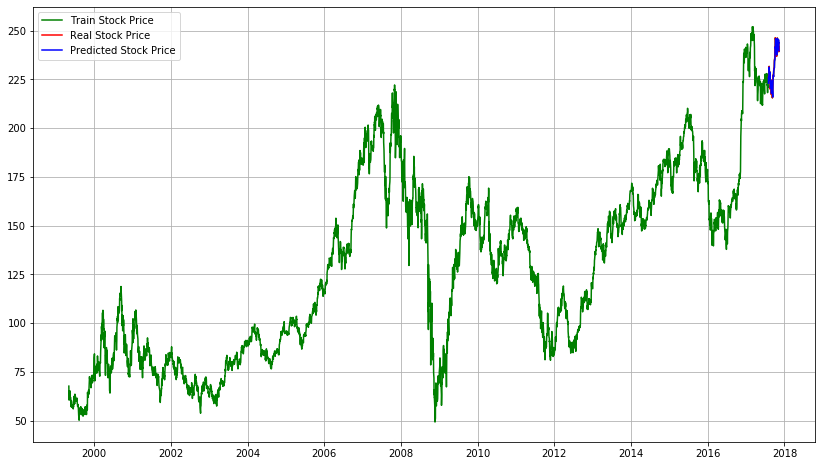

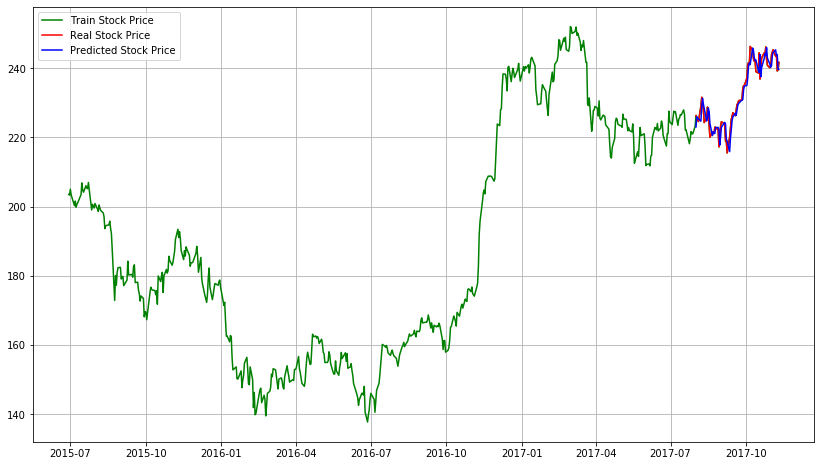

MSE: 6.585688141513062
MAE: 2.004152038329677
RMSE: 2.566259562381222


In [0]:
# ARIMA model
train_arima = train_data['Open']
test_arima = test_data['Open']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
  # predict
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    
plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

In [0]:
# Facebook Prophet

# Drop the columns
ph_df_train = train_data.drop(['Close', 'High', 'Low','Volume', 'OpenInt'], axis=1)
ph_df_train['Date'] = ph_df_train.index
ph_df_train.rename(columns={'Open': 'y', 'Date': 'ds'}, inplace=True)

prop = Prophet(changepoint_prior_scale=0.1)
prop.fit(ph_df_train)
# Create Future dates
future_prices = prop.make_future_dataframe(periods=73)

# Predict Prices
forecast = prop.predict(future_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


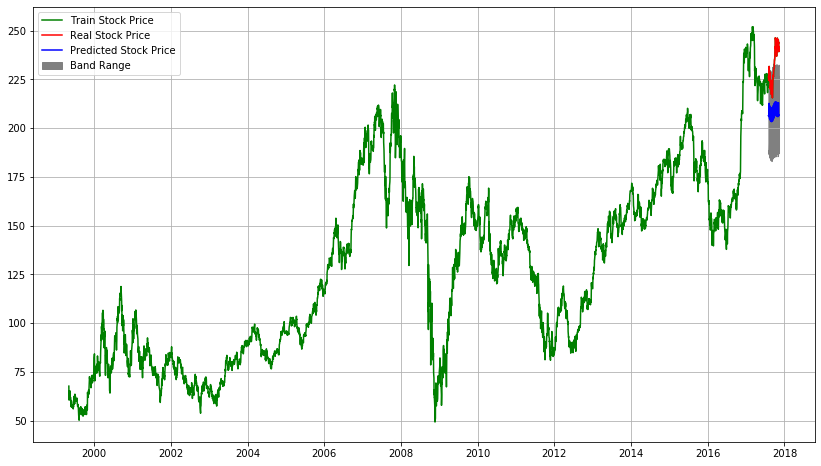

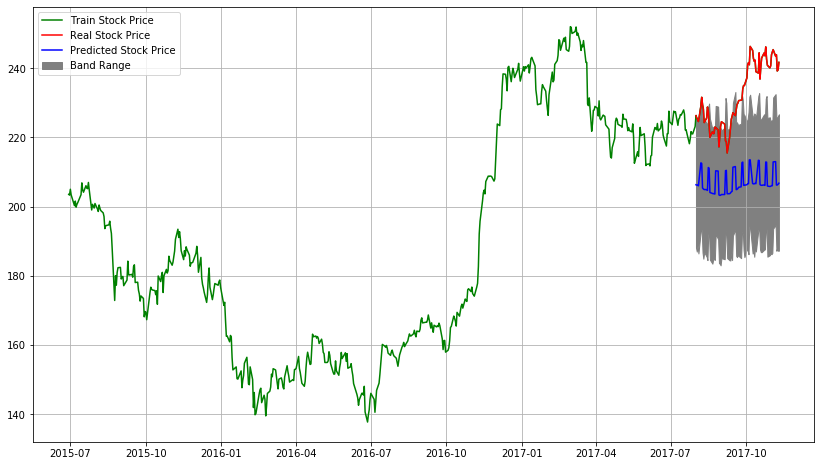

MSE: 699.5725694538435
MAE: 25.058554914045025
RMSE: 26.449434199125008


In [0]:
plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, test_data['Open'], color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, forecast['yhat'][-73:], color = 'blue', label = 'Predicted Stock Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-73:], forecast['yhat_upper'][-73:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, test_data['Open'], color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, forecast['yhat'][-73:], color = 'blue', label = 'Predicted Stock Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-73:], forecast['yhat_upper'][-73:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(test_data['Open'], forecast['yhat'][-73:])))
print('MAE: '+str(mean_absolute_error(test_data['Open'], forecast['yhat'][-73:])))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['Open'], forecast['yhat'][-73:]))))

In [0]:
# LSTM

train = train_data.iloc[:, 0:1].values # selecting open prices
# Feature Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train) 
# Train dataset
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) # we take 30 previous prices
    y_train.append(train_scaled[i, 0]) # and 60-th price as y value
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from numpy.random import seed
seed(2019)

In [0]:
model = Sequential()

# Adding the first LSTM layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) LSTM layer ahead in the network.
model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
# RMSprop is a recommended optimizer as per keras documentation
# check out https://keras.io/optimizers/ for more details
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 65, batch_size = 16)

Epoch 1/65
68087/68087 [==============================] - 57s 835us/step - loss: 0.0017
Epoch 2/65
68087/68087 [==============================] - 54s 789us/step - loss: 4.0111e-04
Epoch 3/65
68087/68087 [==============================] - 54s 796us/step - loss: 3.7885e-04
Epoch 4/65
68087/68087 [==============================] - 55s 810us/step - loss: 3.7450e-04
Epoch 5/65
68087/68087 [==============================] - 56s 818us/step - loss: 3.6339e-04
Epoch 6/65
68087/68087 [==============================] - 56s 823us/step - loss: 3.5389e-04
Epoch 7/65
68087/68087 [==============================] - 56s 821us/step - loss: 3.6240e-04
Epoch 8/65
68087/68087 [==============================] - 56s 815us/step - loss: 3.5236e-04
Epoch 9/65
68087/68087 [==============================] - 55s 808us/step - loss: 3.4586e-04
Epoch 10/65
68087/68087 [==============================] - 57s 834us/step - loss: 3.3999e-04
Epoch 11/65
68087/68087 [==============================] - 57s 839us/step - loss: 3

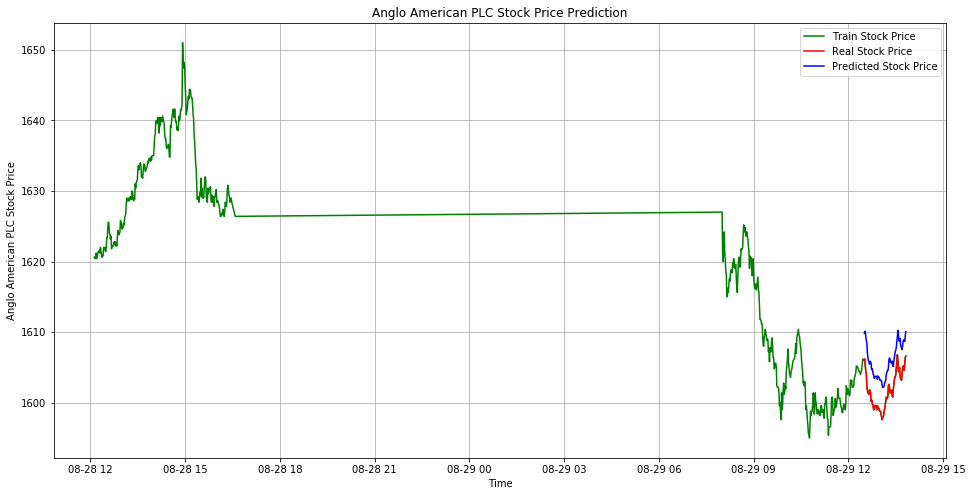

MSE: 17.496737729376253
MAE: 4.118969392123284
RMSE: 4.182910198579005


In [0]:
# this will be used later while comparing and visualization
real_stock_price = test_data.iloc[:,0:1].values # taking open price
# combine original train and test data vertically
# as previous Open Prices are not present in test dataset
# e.g. for predicting Open price for first date in test data, we will need stock open prices on timesteps previous dates  
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
# same steps as we followed while processing training data
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Anglo American PLC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Anglo American PLC Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('lstm_30.pdf')
plt.show()

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse))